 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [92]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns and set Date columne as the DateTimeIndex
whale_returns_csv = Path('/Users/shayan/Desktop/USYD_FinTech_Bootcamp_2023_Material/04-Pandas/Homework/Instructions/Starter_Code/Resources/whale_returns.csv')
whale_returns_df = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_df.dropna(inplace = True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5]:
# Reading algorithmic returns and set Date columne as the DateTimeIndex
algo_returns_csv = Path('/Users/shayan/Desktop/USYD_FinTech_Bootcamp_2023_Material/04-Pandas/Homework/Instructions/Starter_Code/Resources/algo_returns.csv')
algo_returns_df = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns_df.dropna(inplace = True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P TSX 60 Closing Prices and set Date columne as the DateTimeIndex
sp_tsx_csv = Path('/Users/shayan/Desktop/USYD_FinTech_Bootcamp_2023_Material/04-Pandas/Homework/Instructions/Starter_Code/Resources/sp_tsx_history.csv')
sp_tsx_df = pd.read_csv(sp_tsx_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_tsx_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [9]:
# Check Data Types
sp_tsx_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
# Replace "$"
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace("$", "", regex=True)
# Replace ","
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace(",", "", regex=True)
# Change Close column from object to a float
sp_tsx_df["Close"] = sp_tsx_df["Close"].astype("float")
sp_tsx_df.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [11]:
sp_tsx_df.dtypes

Close    float64
dtype: object

In [12]:
# Calculate Daily Returns
sp_tsx_df["Close"] = sp_tsx_df["Close"].pct_change()
sp_tsx_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [13]:
# Drop nulls
sp_tsx_df.dropna(inplace = True)
sp_tsx_df.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_df.rename(columns={"Close": "S&P TSX 60"}, inplace = True)
sp_tsx_df.head()

,S&P TSX 60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns_df = pd.concat(
    [whale_returns_df,algo_returns_df,sp_tsx_df],
    axis = "columns",
    join = "inner"
)
combined_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

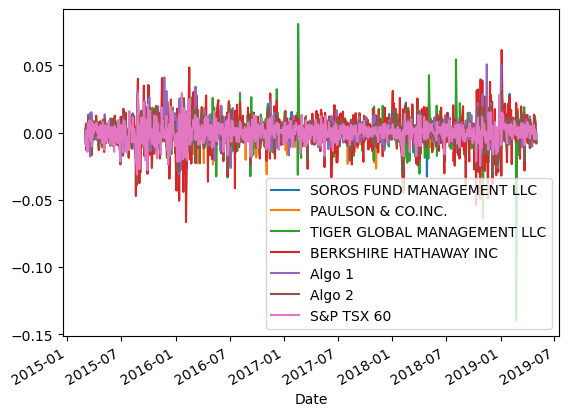

In [16]:
# Plot daily returns of all portfolios
combined_returns_df.plot()

#### Calculate and Plot cumulative returns.

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns_df).cumprod() - 1
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,-0.011872
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,-0.010544
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,-0.020411
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,-0.026832


<AxesSubplot:xlabel='Date'>

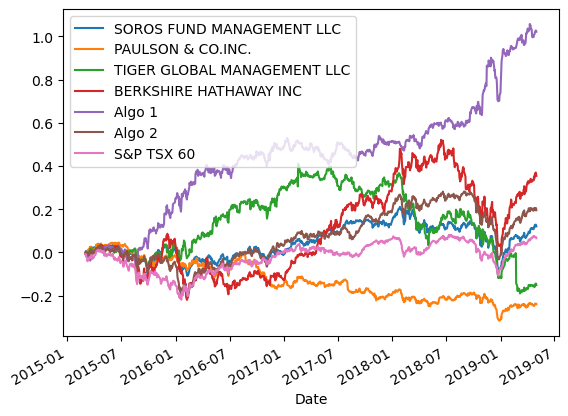

In [18]:
# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


In [19]:
# Box plot to visually show risk

<AxesSubplot:>

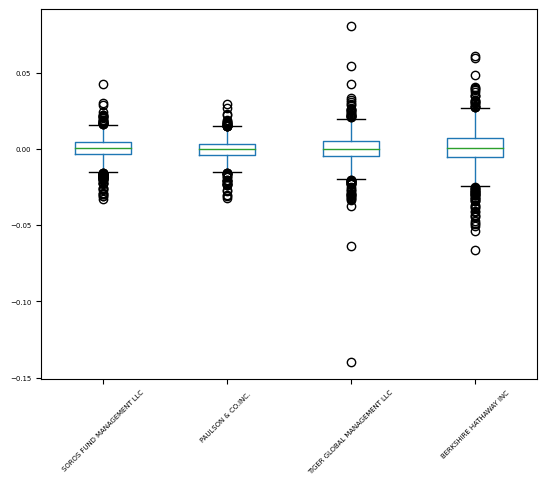

In [20]:
whale_returns_df.boxplot(grid=False, rot=45, fontsize=5)

<AxesSubplot:>

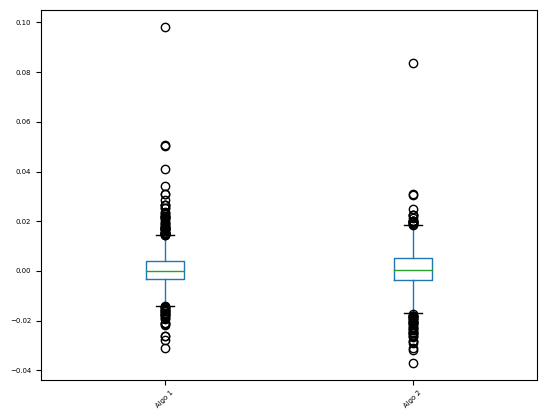

In [21]:
algo_returns_df.boxplot(grid=False, rot=45, fontsize=5)

<AxesSubplot:>

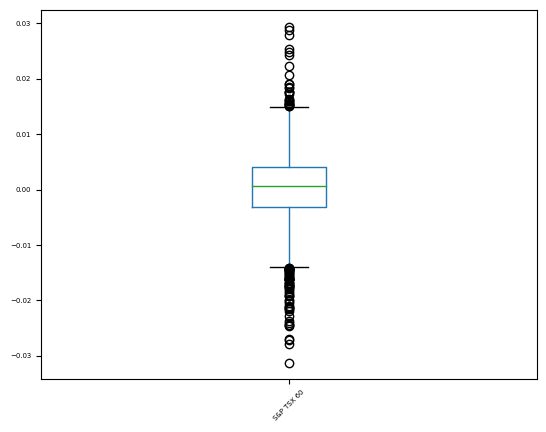

In [22]:
sp_tsx_df.boxplot(grid=False, rot=45, fontsize=5)

<AxesSubplot:>

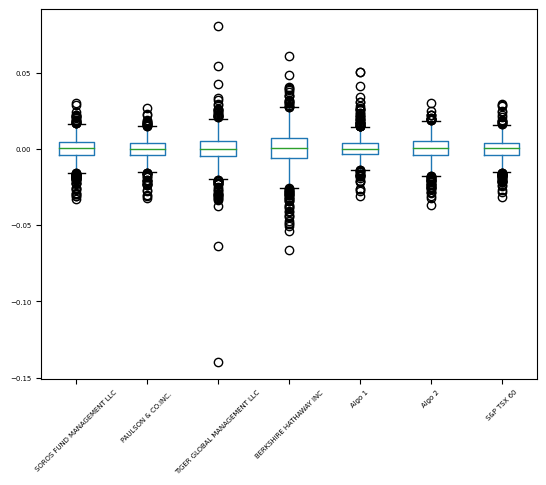

In [23]:
combined_returns_df.boxplot(grid=False, rot=45, fontsize=5)

<AxesSubplot:>

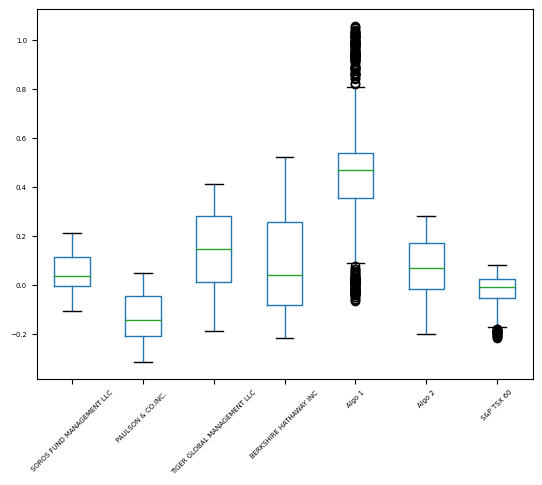

In [24]:
cumulative_returns.boxplot(grid=False, rot=45, fontsize=5)

### Calculate Standard Deviations

In [25]:
# Calculate the daily standard deviations of all portfolios
whale_returns_std = whale_returns_df.std()
algo_returns_std = algo_returns_df.std()

print(f"whale_returns_std: \n{whale_returns_std}\n")
print(f"algo_returns_std: \n{algo_returns_std}\n")

combined_returns_std = combined_returns_df.std()

print(f"combined_returns_std: \n{combined_returns_std}\n")

whale_returns_std: 
SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

algo_returns_std: 
Algo 1    0.007988
Algo 2    0.008466
dtype: float64

combined_returns_std: 
SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX 60                     0.007034
dtype: float64



### Determine which portfolios are riskier than the S&P TSX 60

In [26]:
# Calculate the daily standard deviation of S&P TSX 60
    
sp_tsx_std = sp_tsx_df.std()
print(f"sp_tsx_std: \n{sp_tsx_std}")

# Determine which portfolios are riskier than the S&P TSX 60
# this would be the stock with the highest standard deviation as it shows which one can swin the most in a day

combined_returns_std = combined_returns_std.sort_values(ascending=False)

print(f"\nThe portfolio organised in the odrer of most to least risk based on the standard deviation calculations:\n \n{combined_returns_std}\n ")

# Comparing the output from the previous section this shows algo_returns is the riskiest investment as it has a much higher std compared to the rest of the portfolios which is specially true for Algo 1

sp_tsx_std: 
S&P TSX 60    0.006637
dtype: float64

The portfolio organised in the odrer of most to least risk based on the standard deviation calculations:
 
BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P TSX 60                     0.007034
PAULSON & CO.INC.              0.006982
dtype: float64
 


### Calculate the Annualized Standard Deviation

In [95]:
# Calculate the annualized standard deviation (252 trading days)
whale_returns_std_252 = whale_returns_df.rolling(window=252).std()
algo_returns_std_252 = algo_returns_df.rolling(window=252).std()
sp_tsx_std_252 = sp_tsx_df.rolling(window=252).std()
combined_returns_std_252 = combined_returns_df.rolling(window=252).std()
print(f"Annualised whale_returns_std: \n{whale_returns_std_252.tail()}\n")
print(f"Annualised algo_returns_std: \n{algo_returns_std_252.tail()}\n")
print(f"Annualised sp_tsx_std: \n{sp_tsx_std_252.tail()}\n")
print(f"Annualised combined_returns_std: \n{combined_returns_std_252.tail()}")

Annualised whale_returns_std: 
            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2019-04-25                   0.009327            0.007337   
2019-04-26                   0.009340            0.007358   
2019-04-29                   0.009330            0.007355   
2019-04-30                   0.009095            0.007356   
2019-05-01                   0.009100            0.007318   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2019-04-25                     0.014605                0.015196  
2019-04-26                     0.014627                0.015196  
2019-04-29                     0.014628                0.015155  
2019-04-30                     0.014627                0.015153  
2019-05-01                     0.014606                0.015162  

Annualised algo_returns_std: 
              Algo 1    Algo 2
Date             

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

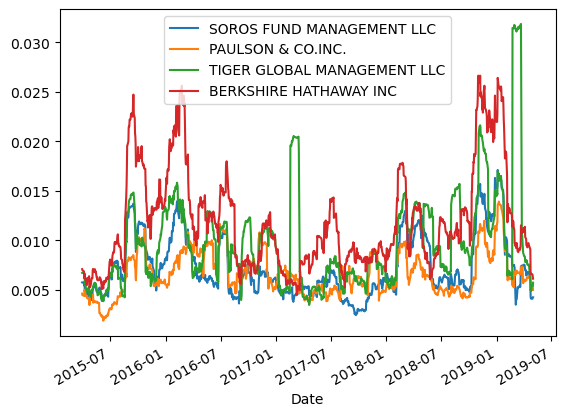

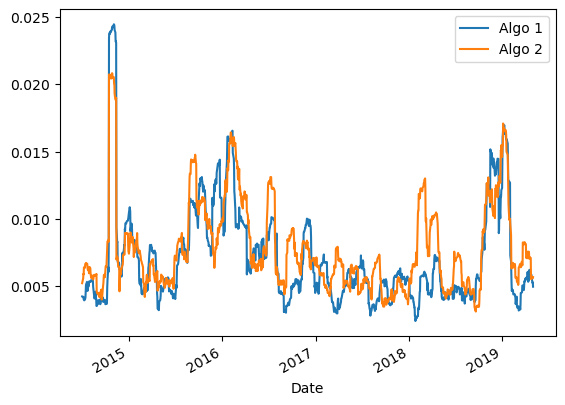

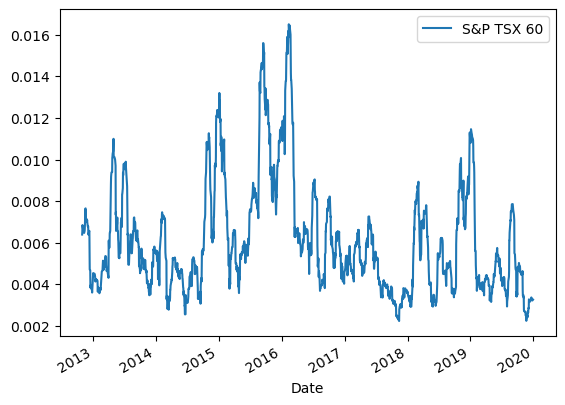

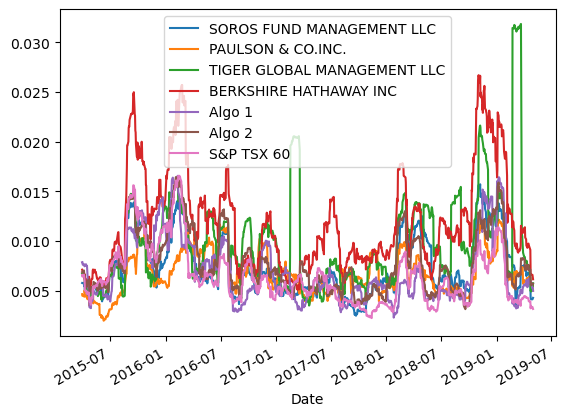

In [32]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
whale_returns_std_21 = whale_returns_df.rolling(window=21).std()
algo_returns_std_21 = algo_returns_df.rolling(window=21).std()
sp_tsx_std_21 = sp_tsx_df.rolling(window=21).std()

# Alternate:  Calculate the rolling standard deviation for all portfolios using a 21-day window for the combined aaframe
combined_returns_df_21 = combined_returns_df.rolling(window=21).std()

# Plot the rolling standard deviation
whale_returns_std_21.plot()
algo_returns_std_21.plot()
sp_tsx_std_21.plot()
combined_returns_df_21.plot()

### Calculate and plot the correlation

In [34]:
# Calculate the correlation
comb_corr = combined_returns_df.corr()

# Display de correlation matrix
comb_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX 60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

BERKSHIRE HATHAWAY INC beta: 1.0160439091063609



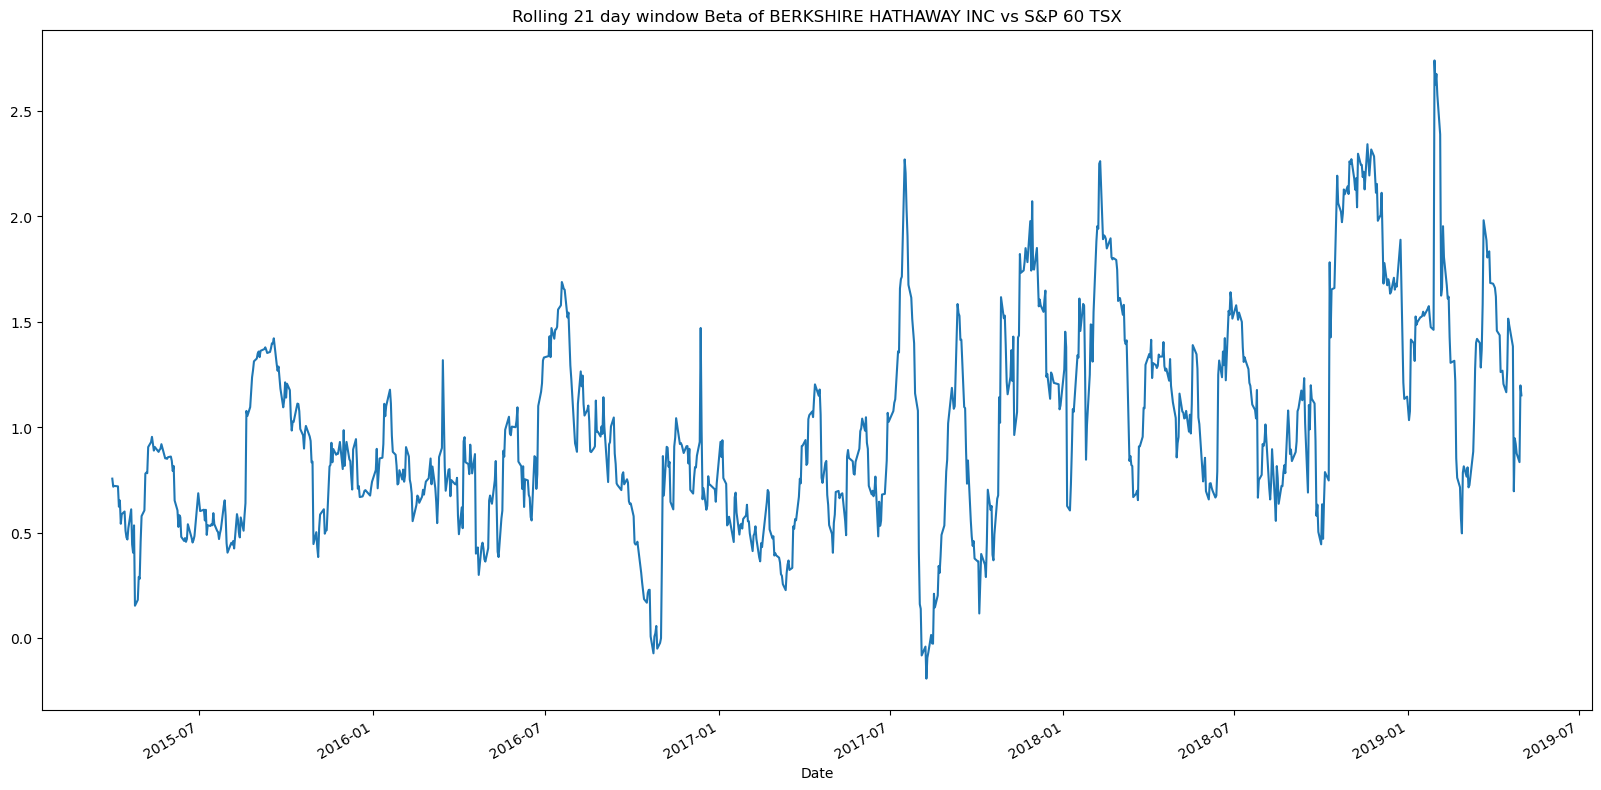

In [35]:
# Calculate covariance of a single portfolio
bh_cov = combined_returns_df['BERKSHIRE HATHAWAY INC'].cov(combined_returns_df['S&P TSX 60'])

# Covariance of the rolling 21 window
bh_cov_21 = combined_returns_df['BERKSHIRE HATHAWAY INC'].rolling(window=21).cov(combined_returns_df['S&P TSX 60'])

# Calculate variance of S&P TSX
sp_tsx_var = combined_returns_df['S&P TSX 60'].var()

# Variance of the rolling 21 window
sp_tsx_var_21 = combined_returns_df['S&P TSX 60'].rolling(window=21).var()

# Computing beta
bh_beta = bh_cov / sp_tsx_var

print(f'BERKSHIRE HATHAWAY INC beta: {bh_beta}\n')

# Computing beta of rolling 21 window
bh_beta_21 = bh_cov_21 / sp_tsx_var_21

# Plot beta trend
bh_beta_21.plot(figsize=(20, 10), title='Rolling 21 day window Beta of BERKSHIRE HATHAWAY INC vs S&P 60 TSX');

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

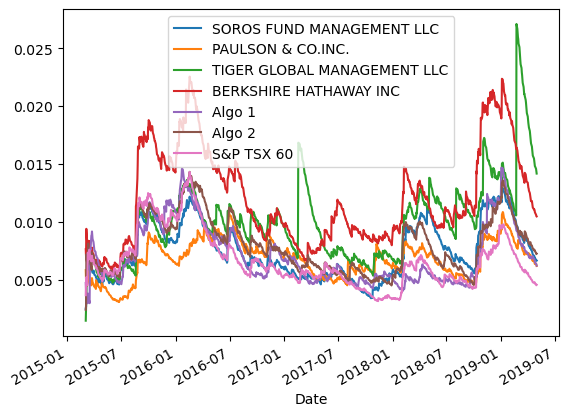

In [36]:
# Use `ewm` to calculate the rolling window
combined_returns_df_ewm_21 = combined_returns_df.ewm(halflife = 21).std()

combined_returns_df_ewm_21.plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [37]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_returns_df.mean() * 252) / (combined_returns_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX 60                     0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

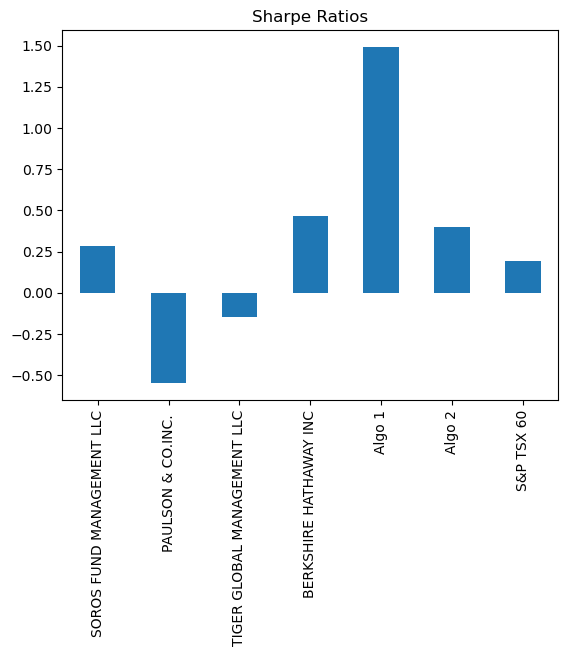

In [38]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Based on the chart above the algorithmic strategies do indeed outperform the market and whales portfolios

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [39]:
# Reading data from 1st stock
msft_csv = Path('/Users/shayan/Desktop/USYD_FinTech_Bootcamp_2023_Material/04-Pandas/Homework/Instructions/Starter_Code/Resources/USYD_FinTech_Week_4_Homework_MSFT.csv')
msft_df = pd.read_csv(msft_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
msft_df.rename(columns={"Close": "MSFT"}, inplace = True)
msft_df.head()

,MSFT
Date,
2015-01-02,46.76
2015-01-05,46.33
2015-01-06,45.65
2015-01-07,46.23
2015-01-08,47.59


In [40]:
# Reading data from 2nd stock
goog_csv = Path('/Users/shayan/Desktop/USYD_FinTech_Bootcamp_2023_Material/04-Pandas/Homework/Instructions/Starter_Code/Resources/USYD_FinTech_Week_4_Homework_GOOG.csv')
goog_df = pd.read_csv(goog_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
goog_df.rename(columns={"Close": "GOOG"}, inplace = True)
goog_df.head()

,GOOG
Date,
2015-01-02,26.17
2015-01-05,25.62
2015-01-06,25.03
2015-01-07,24.99
2015-01-08,25.07


In [41]:
# Reading data from 3rd stock
aapl_csv = Path('/Users/shayan/Desktop/USYD_FinTech_Bootcamp_2023_Material/04-Pandas/Homework/Instructions/Starter_Code/Resources/USYD_FinTech_Week_4_Homework_AAPL.csv')
aapl_df = pd.read_csv(msft_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
aapl_df.rename(columns={"Close": "AAPL"}, inplace = True)
aapl_df.head()

,AAPL
Date,
2015-01-02,46.76
2015-01-05,46.33
2015-01-06,45.65
2015-01-07,46.23
2015-01-08,47.59


In [43]:
# Combine all stocks in a single DataFrame
tech_df = pd.concat(
    [msft_df, goog_df, aapl_df],
    axis = "columns",
    join = "inner"
)
tech_df.head()

,MSFT,GOOG,AAPL
Date,,,
2015-01-02,46.76,26.17,46.76
2015-01-05,46.33,25.62,46.33
2015-01-06,45.65,25.03,45.65
2015-01-07,46.23,24.99,46.23
2015-01-08,47.59,25.07,47.59


In [44]:
# Reset Date index
# Done above already

In [45]:
# Reorganize portfolio data by having a column per symbol
# Done above already

In [65]:
# Calculate daily returns
tech_dly_rtn = tech_df.pct_change()

# Drop NAs
tech_dly_rtn.dropna(inplace = True)

# Display sample data
tech_dly_rtn.head()

,MSFT,GOOG,AAPL
Date,,,
2015-01-05,-0.009196,-0.021016,-0.009196
2015-01-06,-0.014677,-0.023029,-0.014677
2015-01-07,0.012705,-0.001598,0.012705
2015-01-08,0.029418,0.003201,0.029418
2015-01-09,-0.008405,-0.013163,-0.008405


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [98]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
tech_returns_df = tech_dly_rtn.dot(weights)

# Display sample data
tech_returns_df.head()

Date
2015-01-05   -0.013136
2015-01-06   -0.017461
2015-01-07    0.007938
2015-01-08    0.020679
2015-01-09   -0.009991
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [84]:
# Join your returns DataFrame to the original returns DataFrame
full_comb_df = pd.concat(
    [combined_returns_df, tech_returns_df],
    axis = "columns",
    join = "inner"
)

# Renaming the columne assoicated with tech portfolio+
full_comb_df.rename(columns = {0 : "Tech Portfolio"}, inplace = True)

# Display sample data
full_comb_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,Tech Portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,-0.007829
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,-0.003505
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,0.001940
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,-0.016013
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,0.008300
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.024042
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.006142
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.003419


In [85]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
full_comb_df.dropna()
full_comb_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,Tech Portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,-0.007829
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,-0.003505
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,0.001940
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,-0.016013
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,0.008300


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [88]:
# Calculate the annualized `std`
full_comb_df_252 = full_comb_df.rolling(window=252).std()
full_comb_df_252.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,Tech Portfolio
Date,,,,,,,,
2019-04-25,0.008976,0.007109,0.014476,0.014715,0.008119,0.008389,0.006165,0.014694
2019-04-26,0.008983,0.007131,0.014498,0.014726,0.008107,0.008395,0.006126,0.014698
2019-04-29,0.008967,0.007123,0.014486,0.014730,0.008104,0.008390,0.006117,0.014698
2019-04-30,0.008954,0.007118,0.014442,0.014722,0.008107,0.008386,0.006117,0.014742
2019-05-01,0.008960,0.007118,0.014442,0.014725,0.008102,0.008395,0.006119,0.014798


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

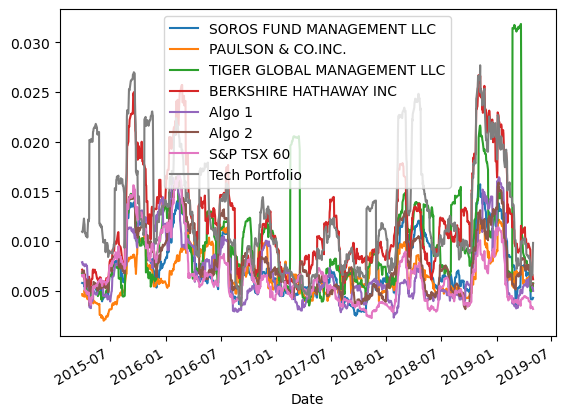

In [89]:
# Calculate rolling standard deviation
full_comb_df_21 = full_comb_df.rolling(window=21).std()
full_comb_df_21.tail()
# Plot rolling standard deviation
full_comb_df_21.plot()

### Calculate and plot the correlation

In [109]:
# Calculate and plot the correlation
full_comb_df_corr = full_comb_df_21.corr()
full_comb_df_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,Tech Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.639357,0.440919,0.850889,0.704403,0.864039,0.753445,0.790273
PAULSON & CO.INC.,0.639357,1.000000,0.399144,0.611234,0.572830,0.669701,0.437059,0.489376
TIGER GLOBAL MANAGEMENT LLC,0.440919,0.399144,1.000000,0.400139,0.257098,0.349122,0.269010,0.301762
BERKSHIRE HATHAWAY INC,0.850889,0.611234,0.400139,1.000000,0.778384,0.816004,0.744956,0.720737
Algo 1,0.704403,0.572830,0.257098,0.778384,1.000000,0.757384,0.772080,0.583805
Algo 2,0.864039,0.669701,0.349122,0.816004,0.757384,1.000000,0.861322,0.680671
S&P TSX 60,0.753445,0.437059,0.269010,0.744956,0.772080,0.861322,1.000000,0.608142
Tech Portfolio,0.790273,0.489376,0.301762,0.720737,0.583805,0.680671,0.608142,1.000000


<AxesSubplot:>

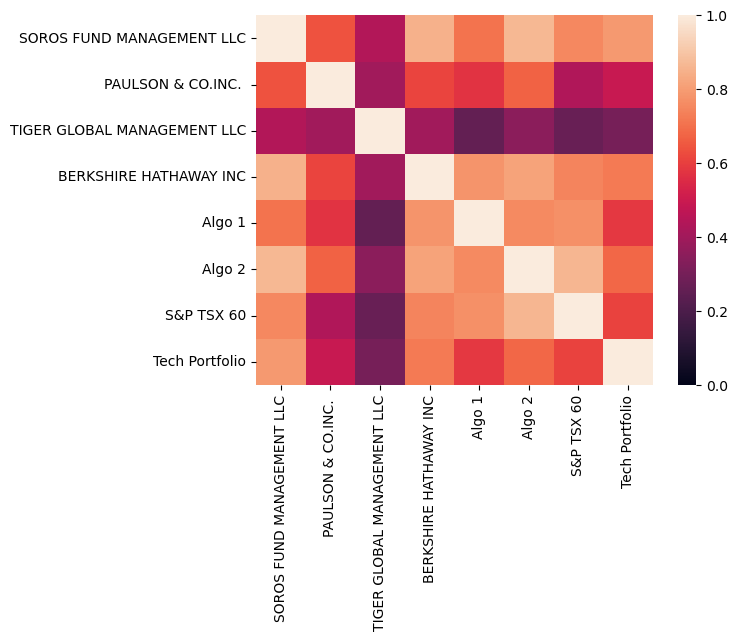

In [110]:
# Heatmap plot of the corelation
sns.heatmap(full_comb_df_corr, vmin=0, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 21-Day Beta of Tech Portfolio vs S&P TSX 60'}, xlabel='Date'>

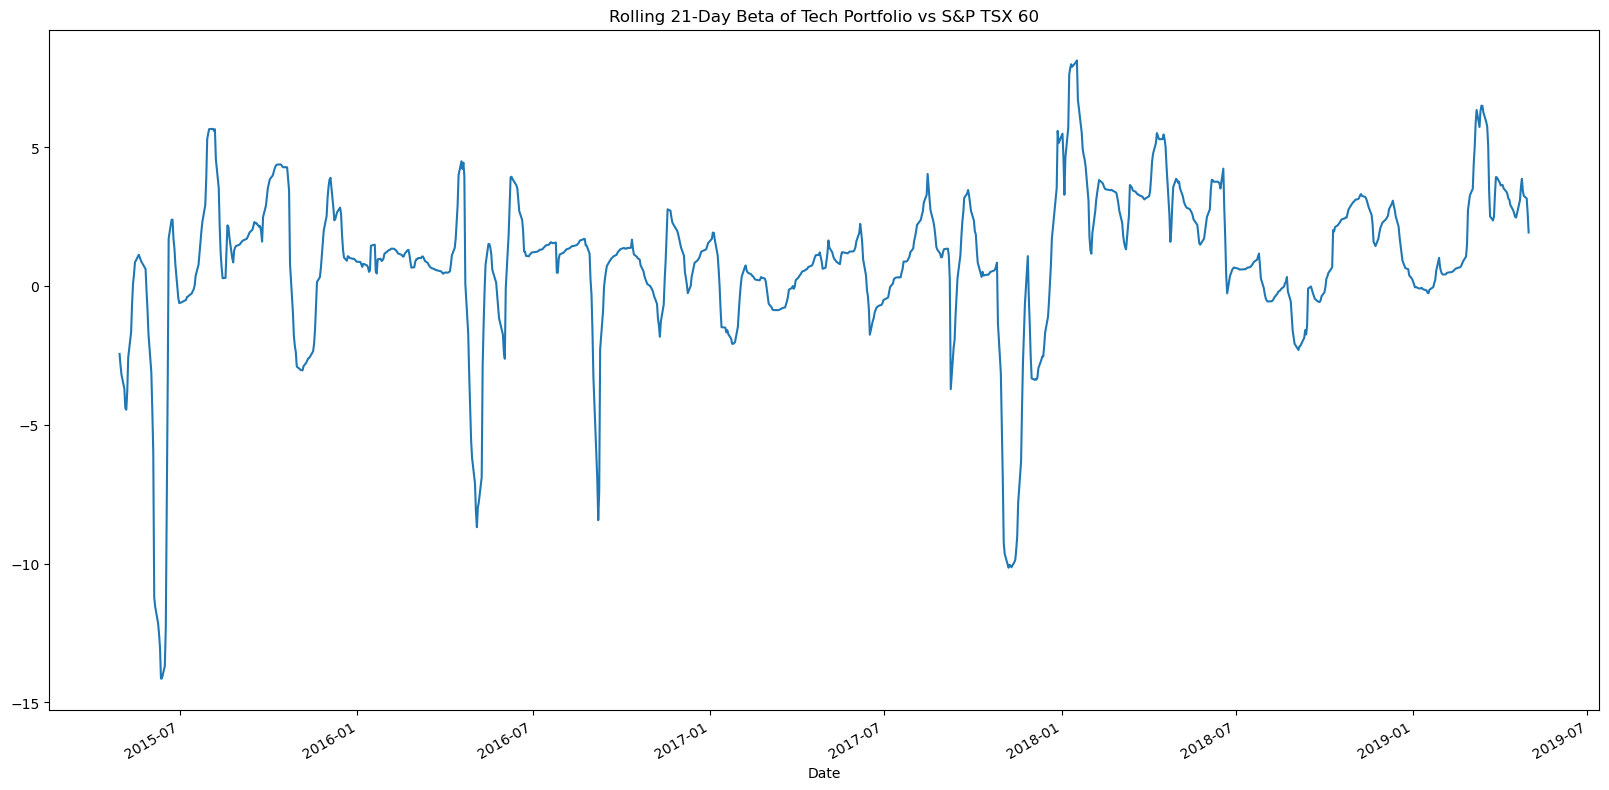

In [121]:
# Calculate and plot Beta
sp_tsx_var_21_2 = full_comb_df_21['S&P TSX 60'].rolling(window=21).var()

tech_cov_21 = full_comb_df_21['Tech Portfolio'].rolling(window=21).cov(full_comb_df_21['S&P TSX 60'])

tech_beta_21 = tech_cov_21 / sp_tsx_var_21_2

tech_beta_21.plot(figsize=(20, 10), title='Rolling 21-Day Beta of Tech Portfolio vs S&P TSX 60')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [126]:
# Calculate Annualized Sharpe Ratios
full_comb_sharpe_ratios = (full_comb_df.mean() * 252) / (full_comb_df.std() * np.sqrt(252))
full_comb_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX 60                     0.195550
Tech Portfolio                 1.087535
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

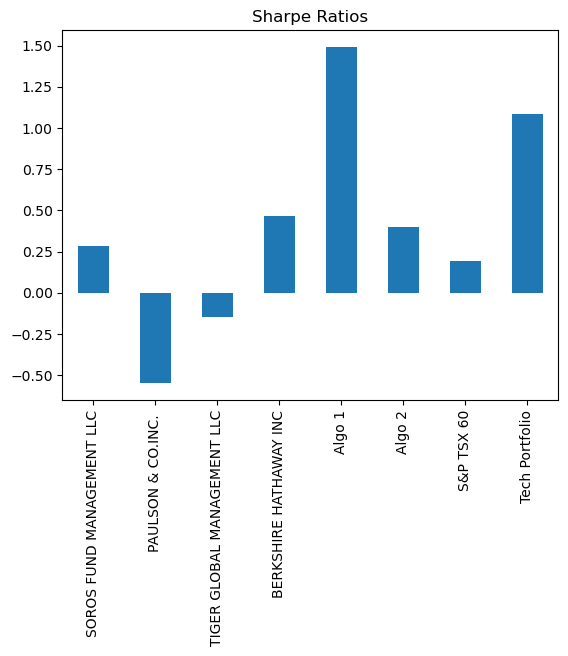

In [127]:
# Visualize the sharpe ratios as a bar plot
full_comb_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

The Tech portfolio whilst having a very low correlation shows the second best returns after Algo 1 in the selection of portfolios available.